In [13]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from scipy import stats

In [14]:
data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Alzheimer's Disease\alzheimers_disease_data.csv")

In [15]:
data.sample(3)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
1299,6050,88,1,0,1,21.560130,1,6.192885,1.794872,6.246839,...,0,0,5.328394,0,0,0,0,0,0,XXXConfid
888,5639,65,1,0,1,29.592164,0,9.651057,1.266241,0.549712,...,1,0,2.407663,0,0,0,1,0,1,XXXConfid
983,5734,68,0,0,0,33.929724,1,3.684081,5.822422,7.602607,...,0,0,3.978265,1,0,0,0,1,1,XXXConfid


In [16]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [18]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking Missing Value

In [19]:
print(data.isnull().sum())

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

# Droping Ir-relevant feature

In [20]:
data.drop('DoctorInCharge', axis=1, inplace=True)
data.drop(columns=['PatientID'] , inplace=True)


In [21]:
data.sample(2)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
1273,60,0,0,1,33.996956,0,8.402199,8.526070,1.267426,4.335423,...,1.846108,0,1,5.024672,0,0,1,0,1,1
1507,82,1,0,0,32.912732,0,7.858106,7.495348,7.517459,5.971892,...,8.702120,0,1,0.203655,0,0,0,0,0,1


# EDA

In [58]:
data['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

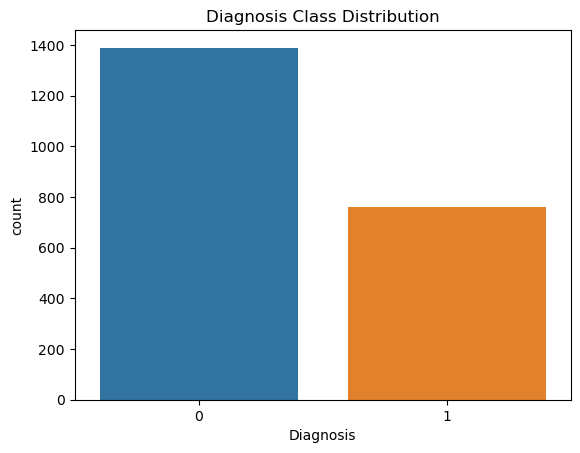

In [22]:
# 1. Diagnosis class distribution
sns.countplot(x='Diagnosis', data=data)
plt.title("Diagnosis Class Distribution")
plt.show()

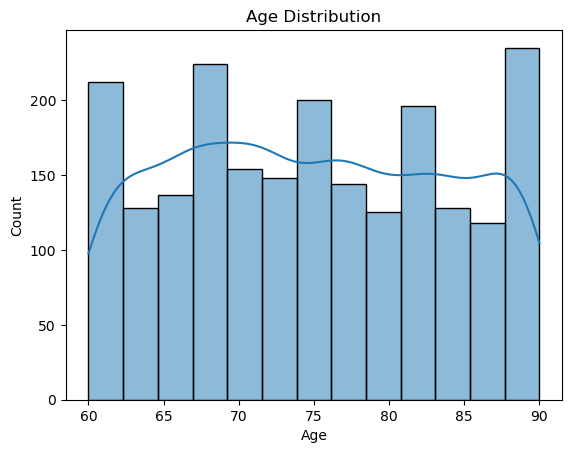

In [23]:
# 2. Age distribution
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

In [24]:
# sns.pairplot(data, hue='Diagnosis')


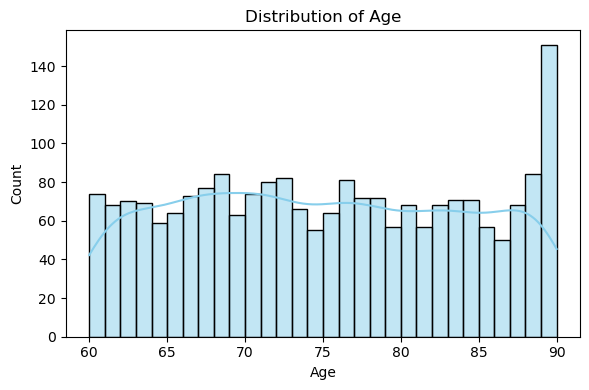

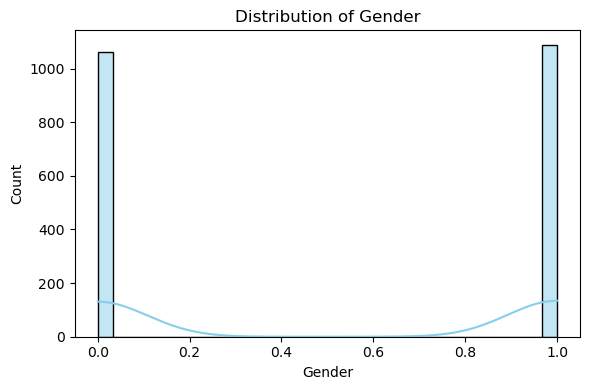

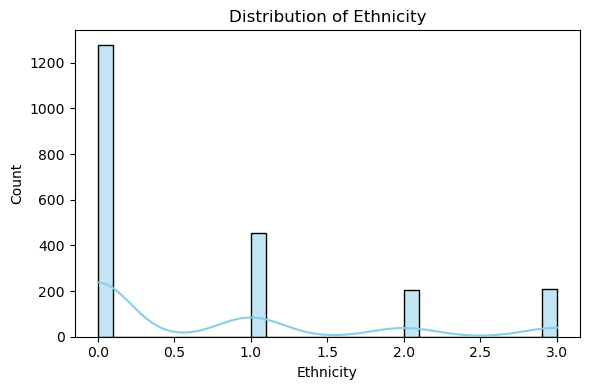

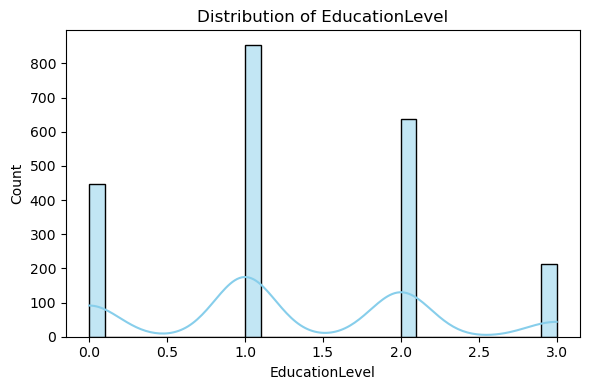

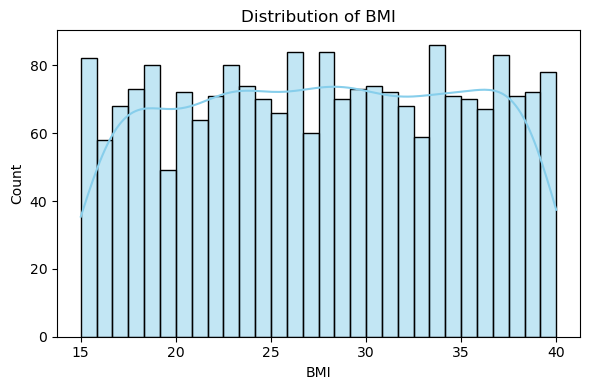

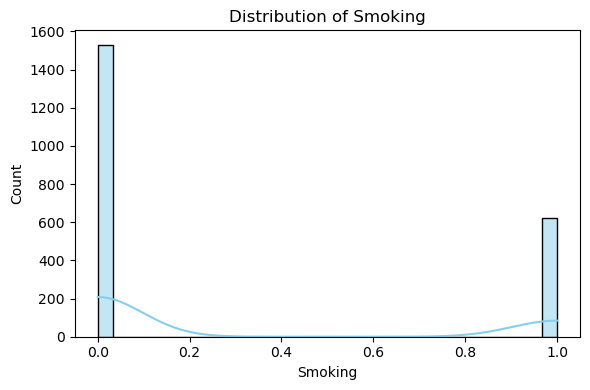

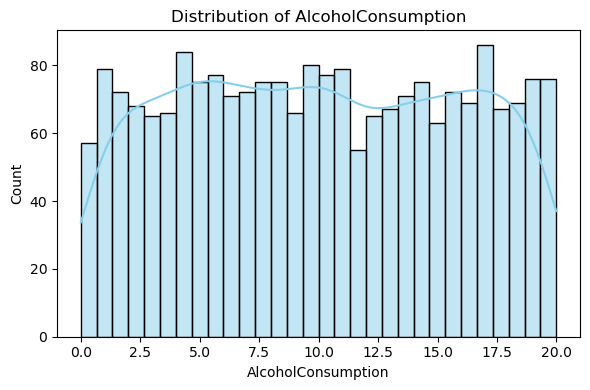

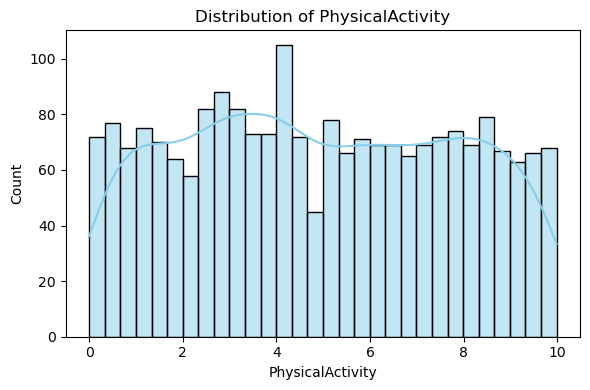

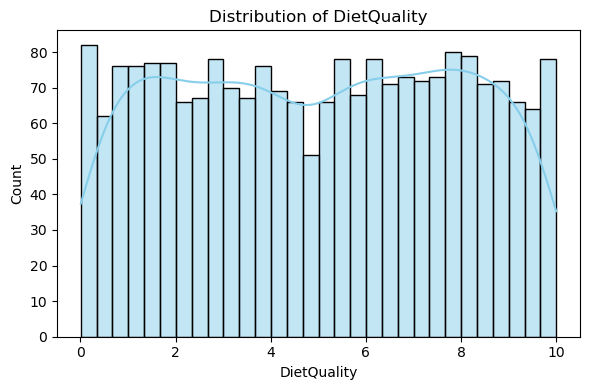

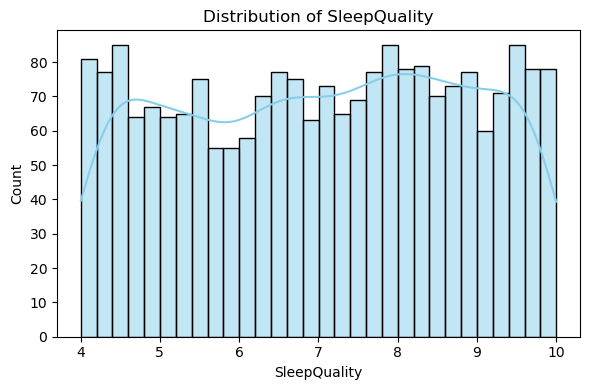

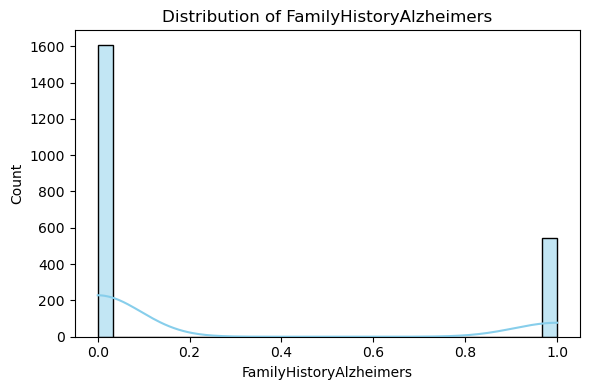

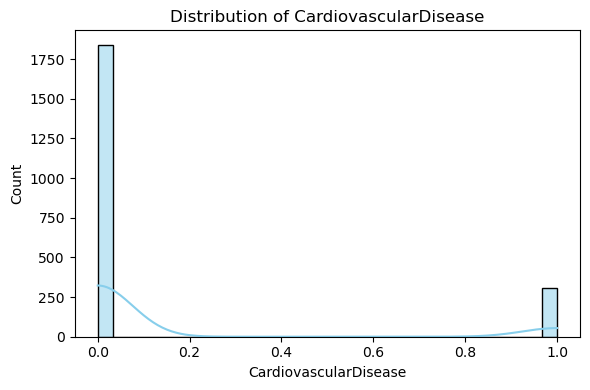

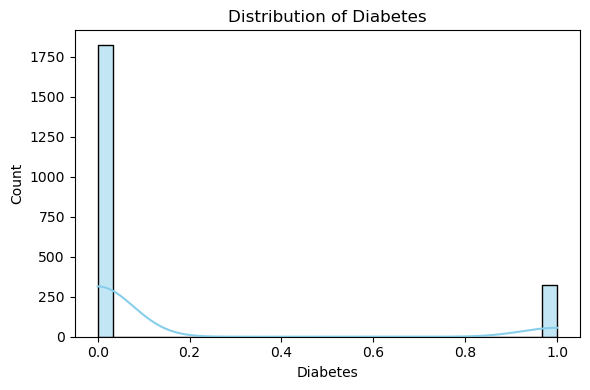

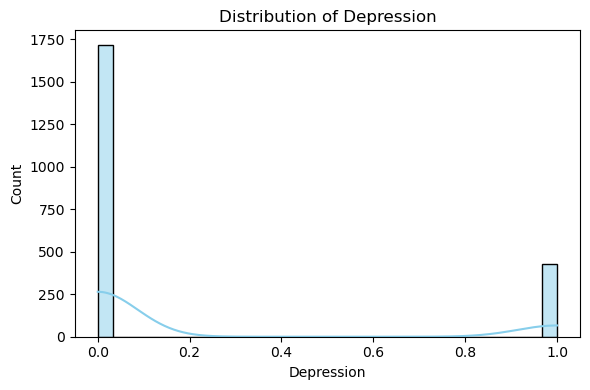

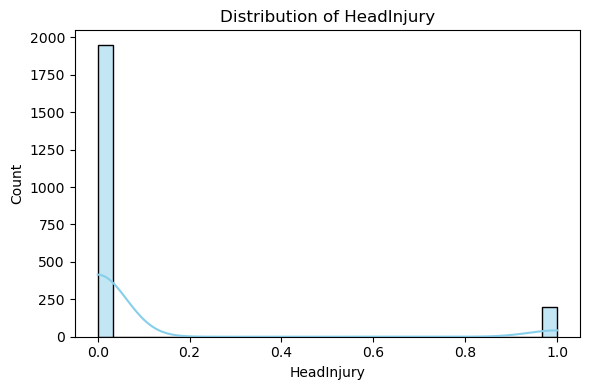

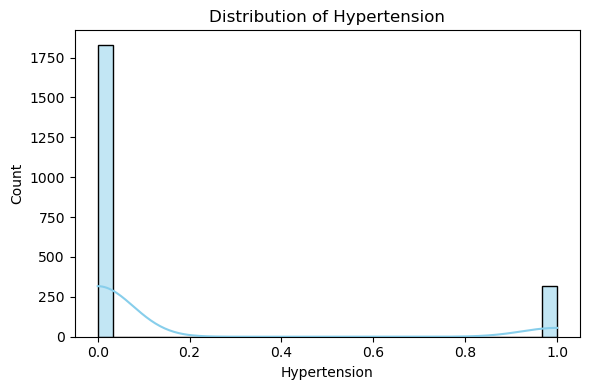

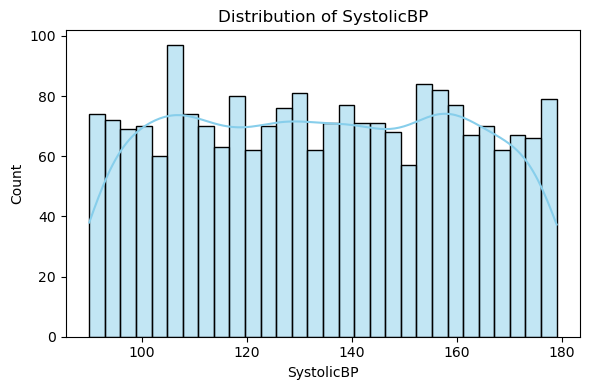

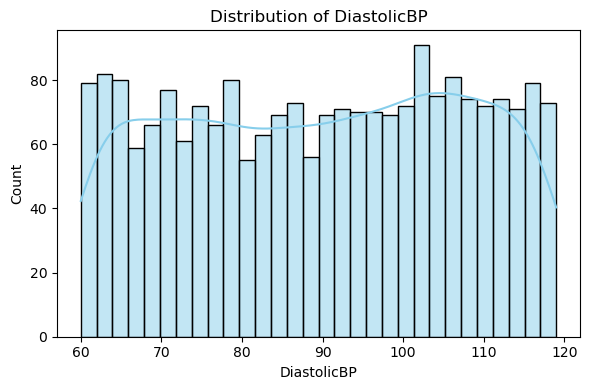

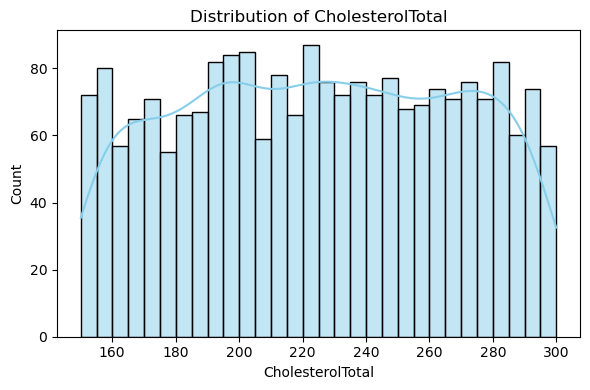

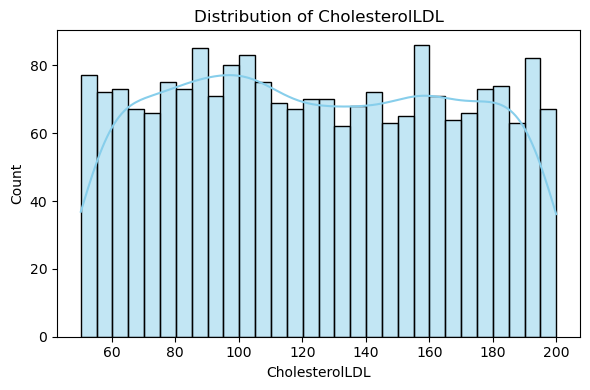

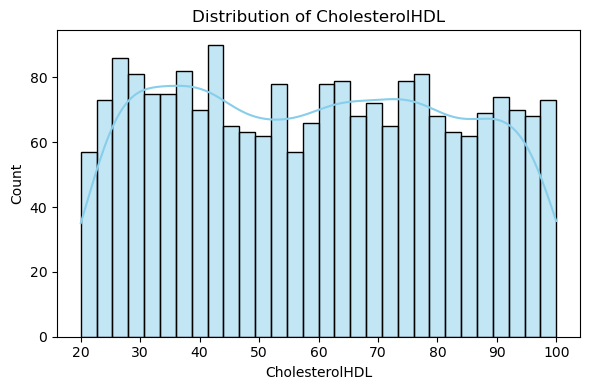

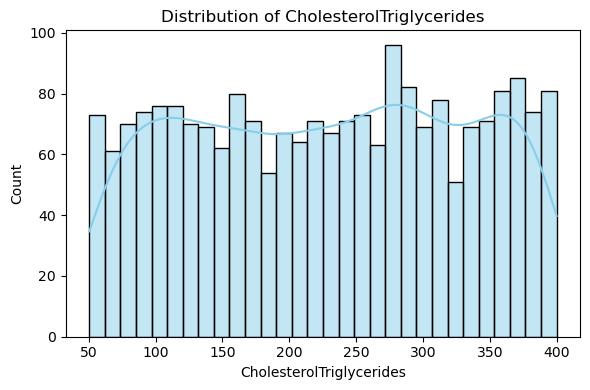

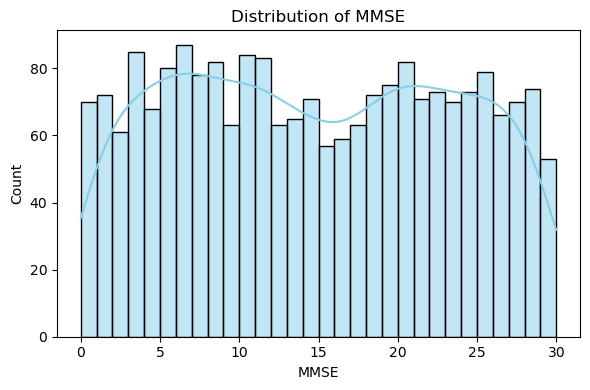

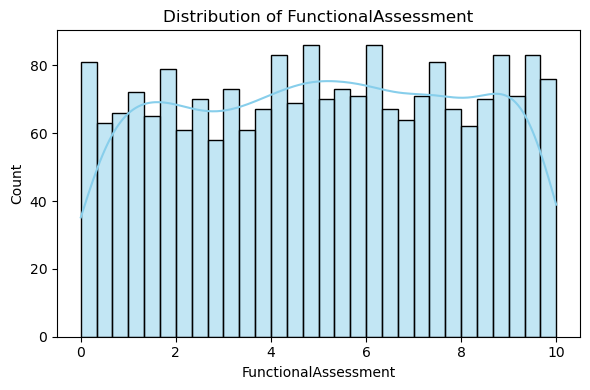

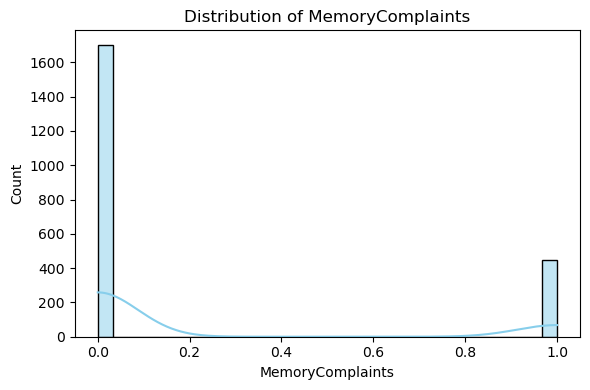

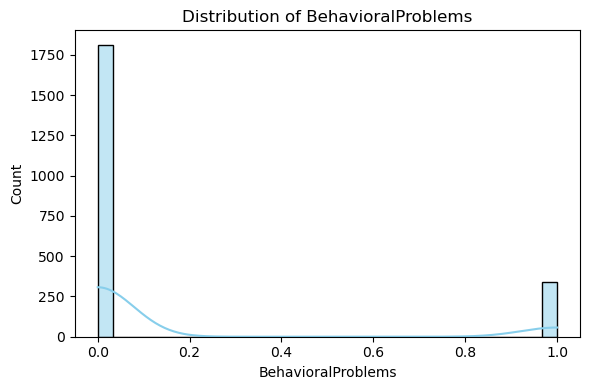

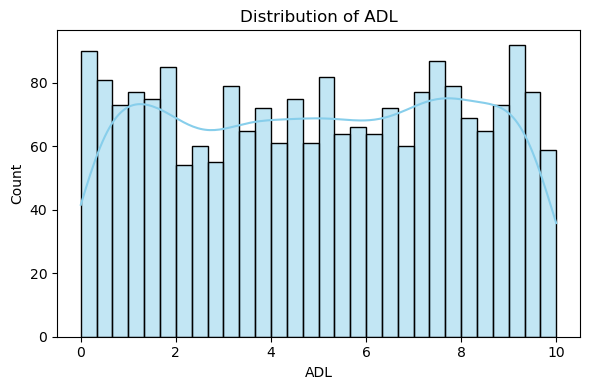

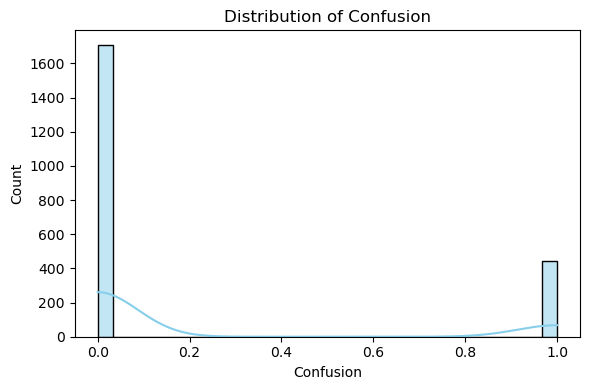

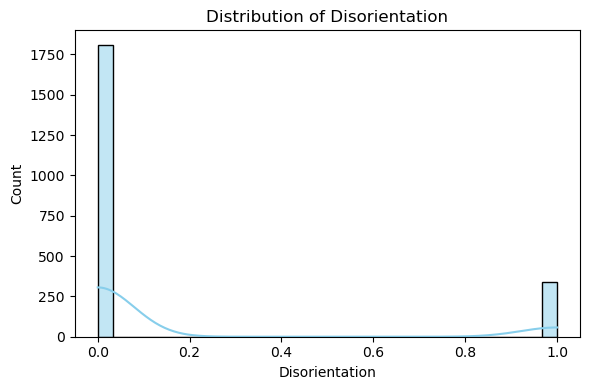

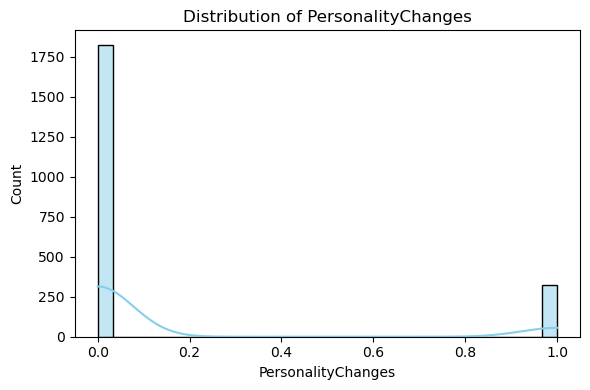

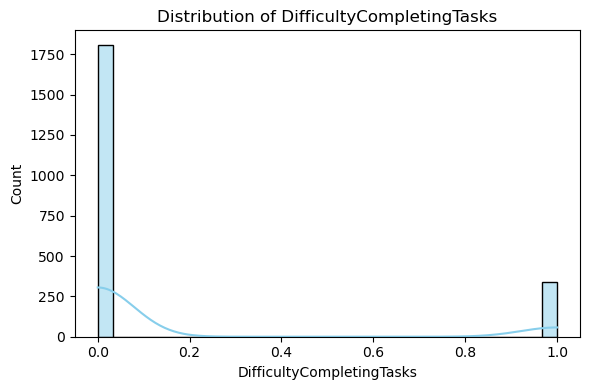

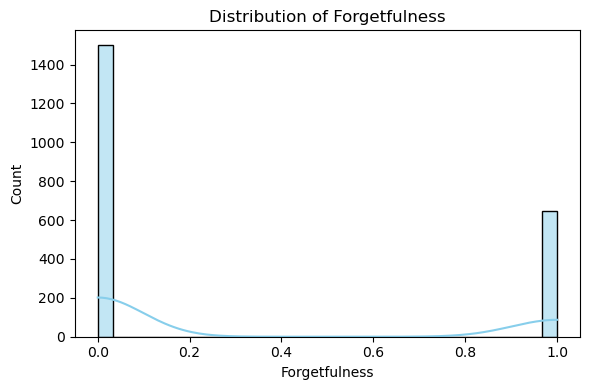

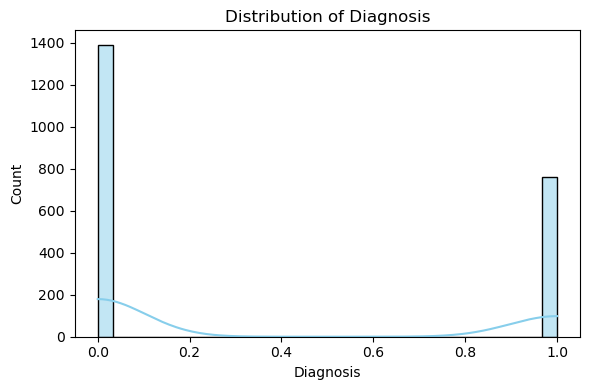

In [26]:
# data = data.drop(columns=['PatientID', 'DoctorInCharge'])
# Separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns

# Plot distributions for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Plot bar charts for categorical columns (if any)
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


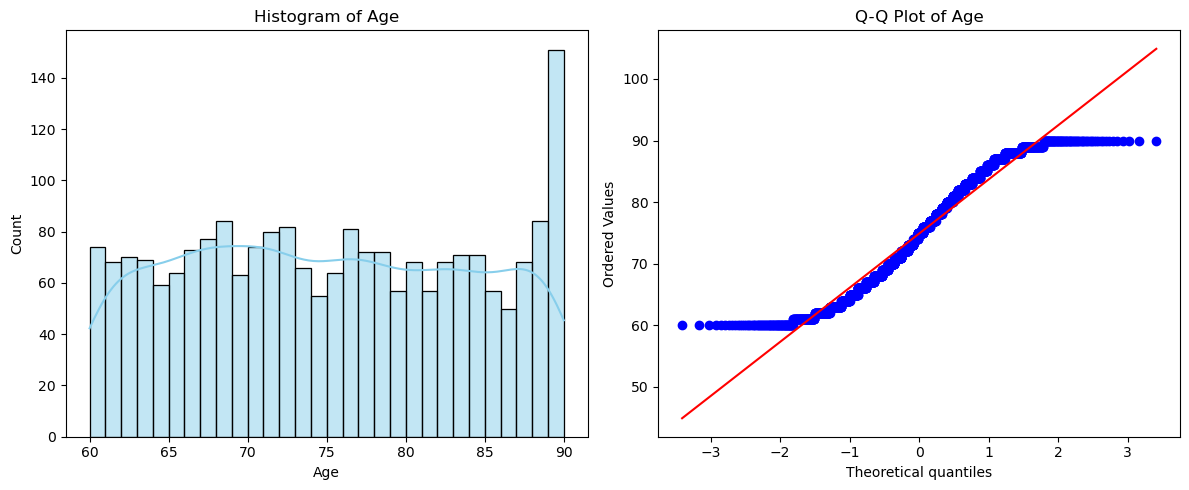

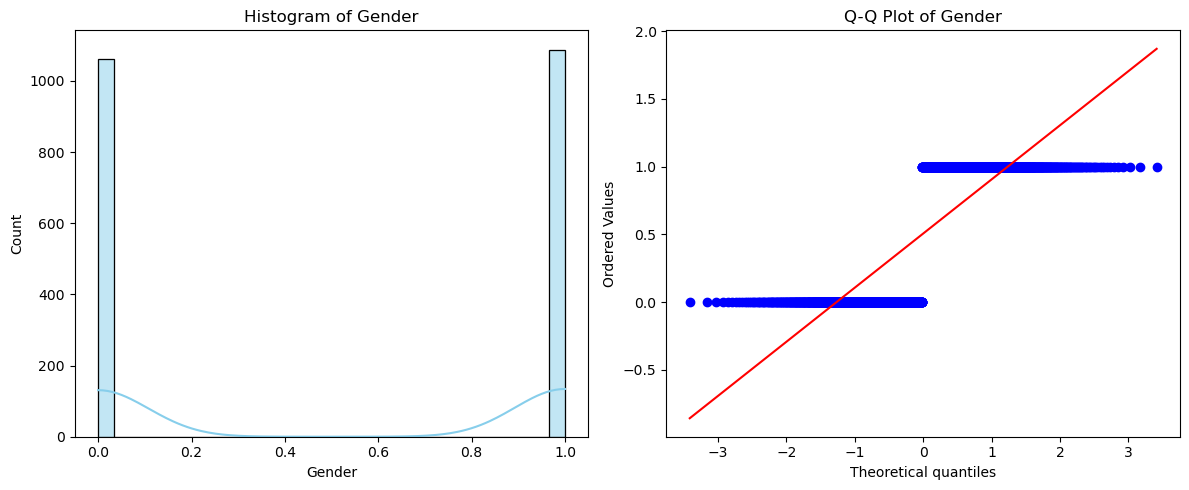

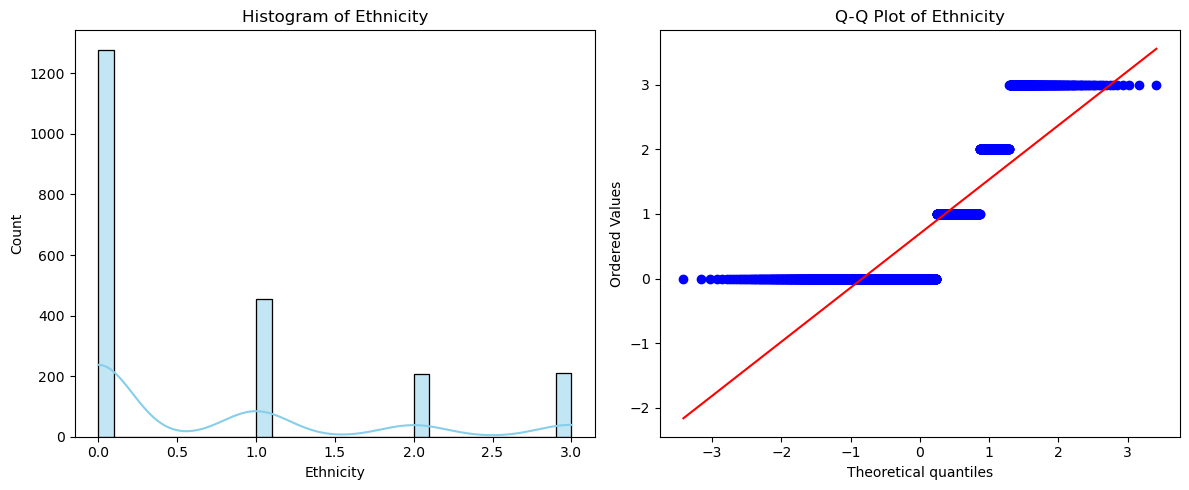

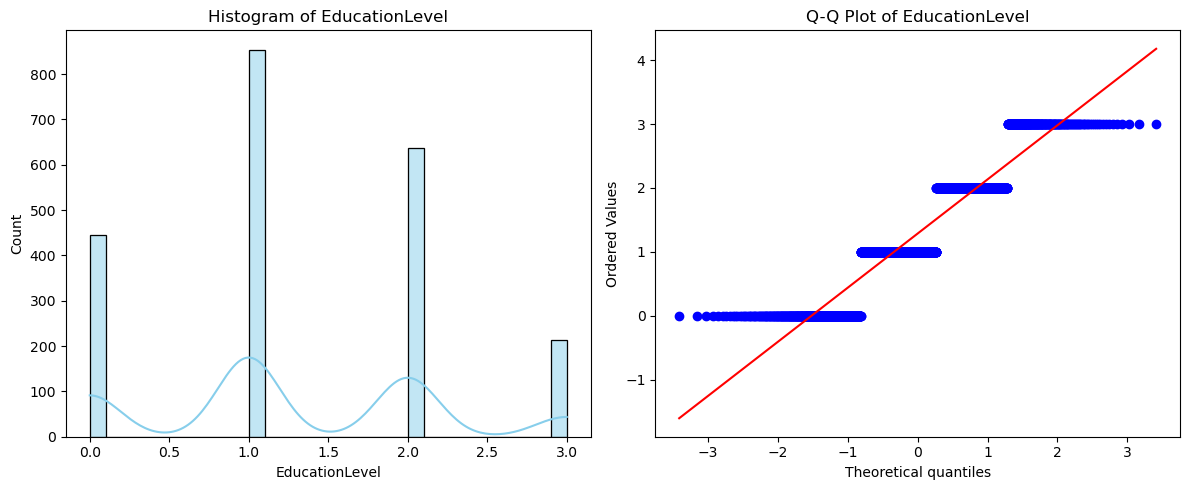

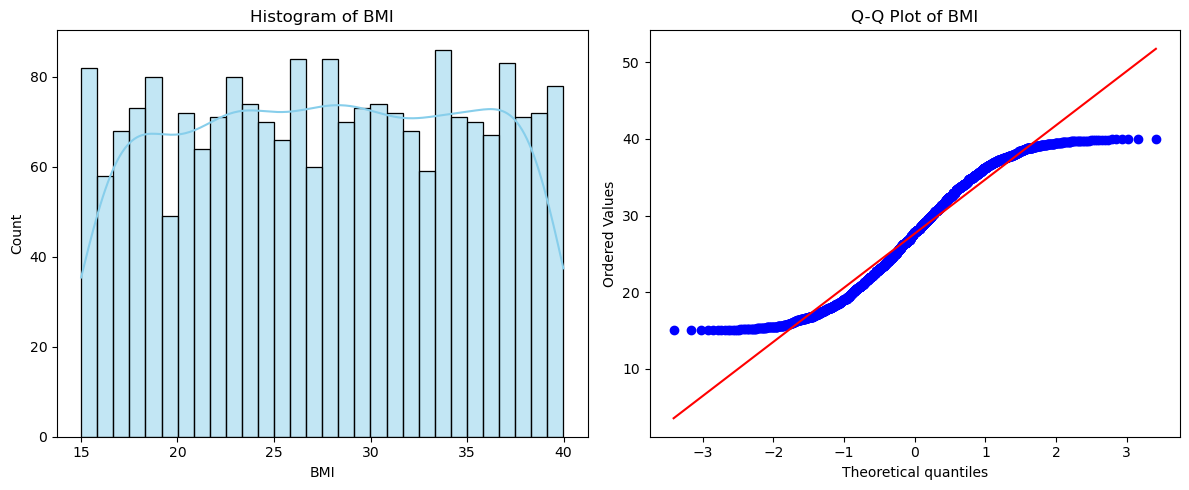

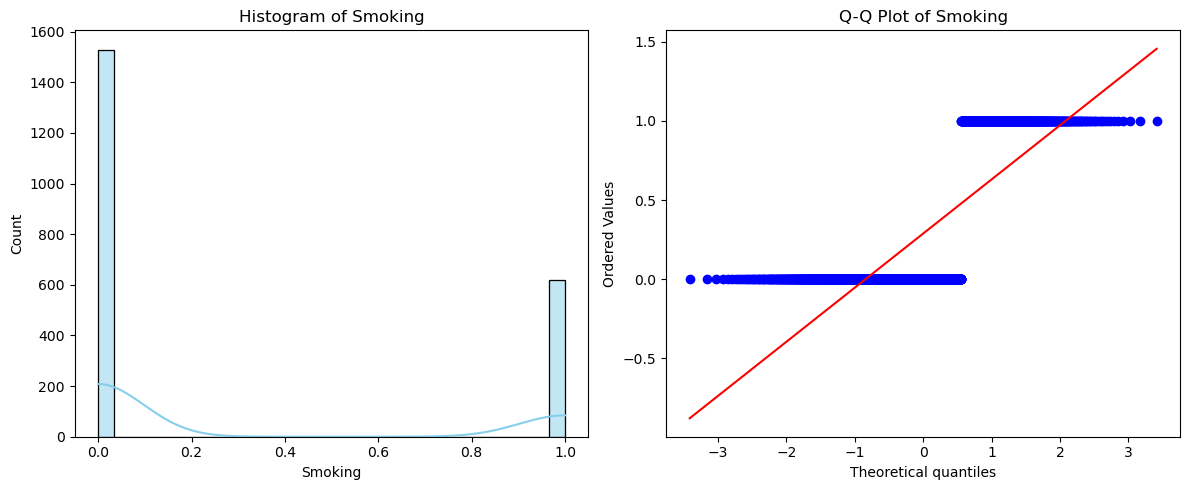

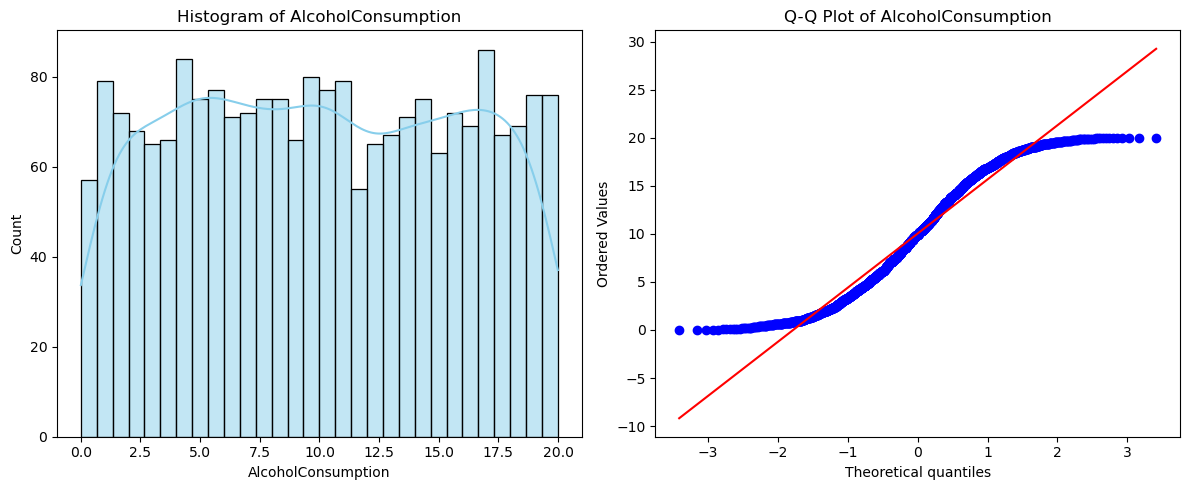

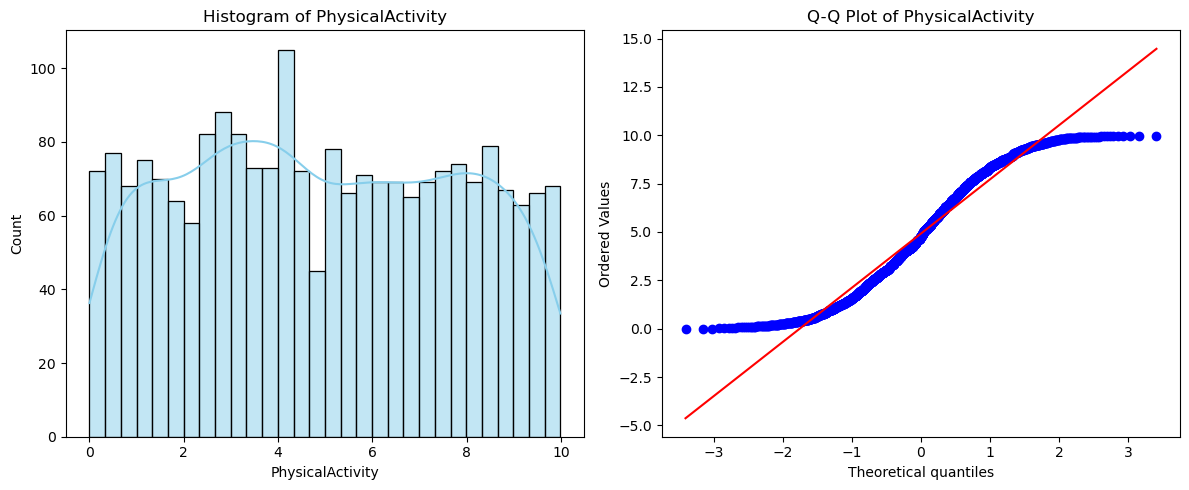

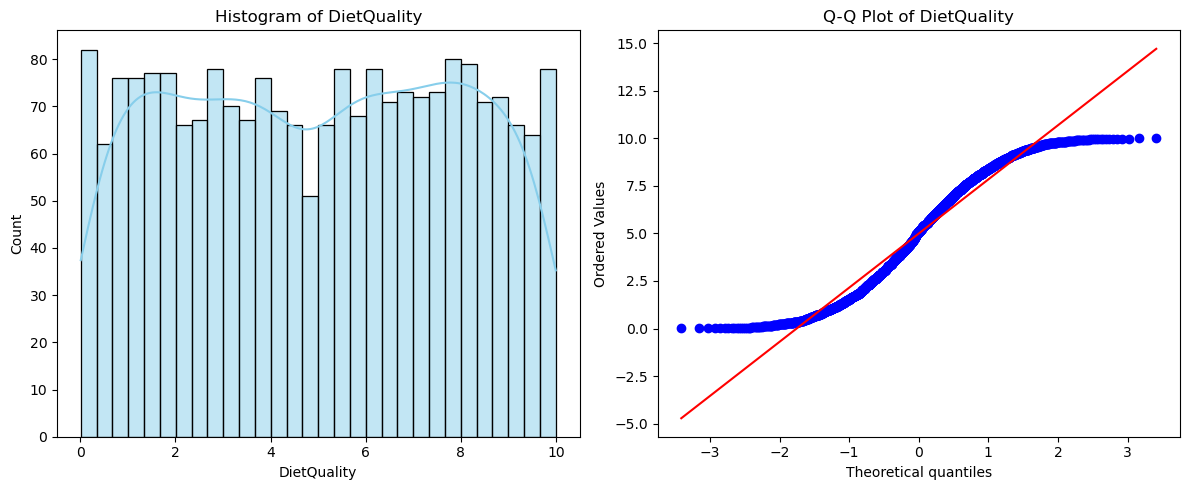

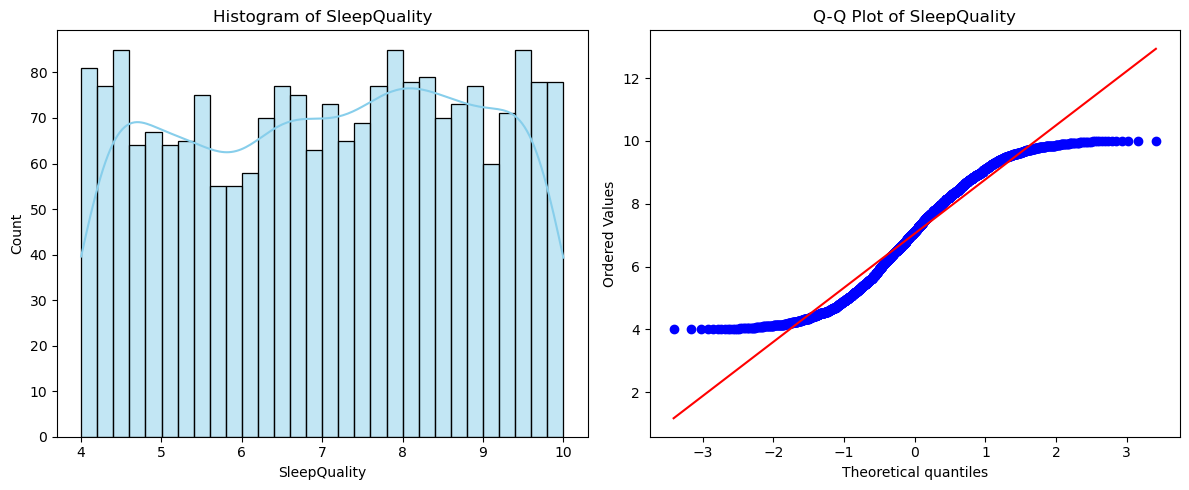

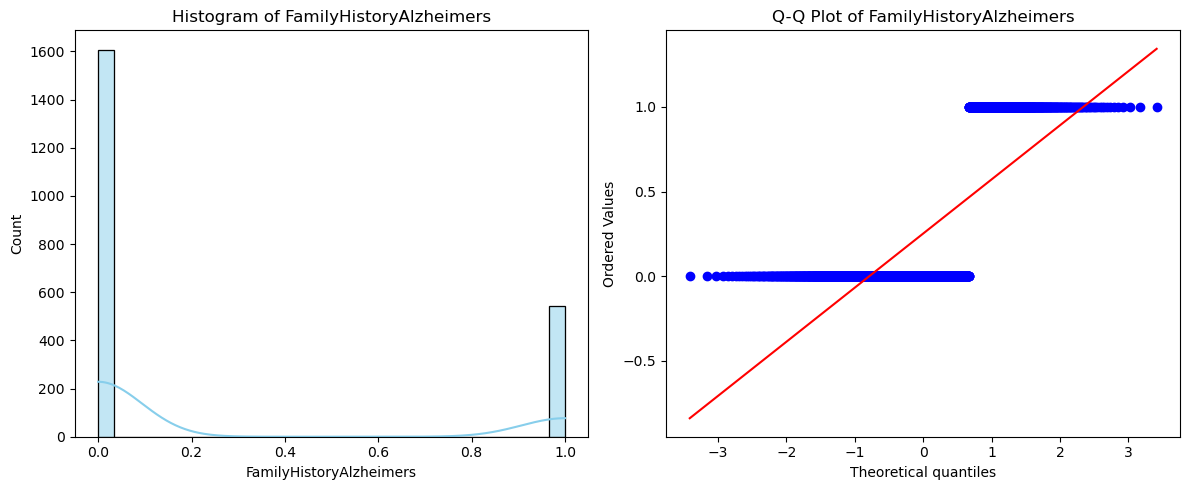

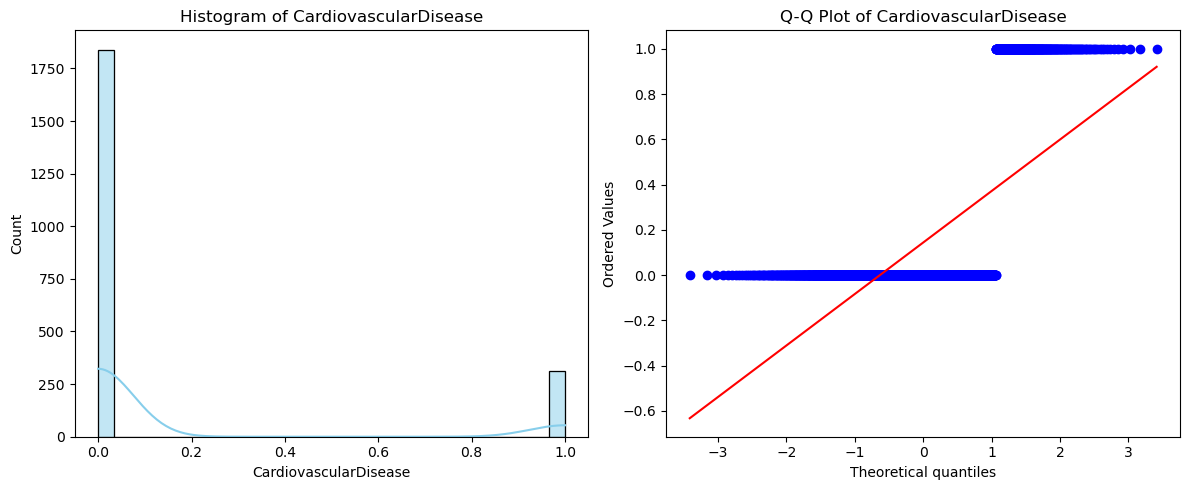

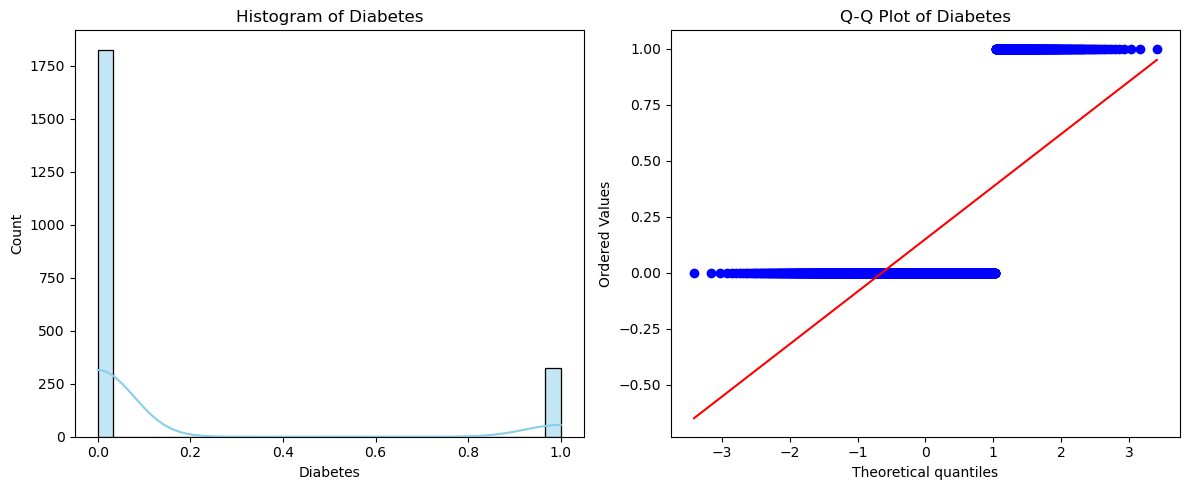

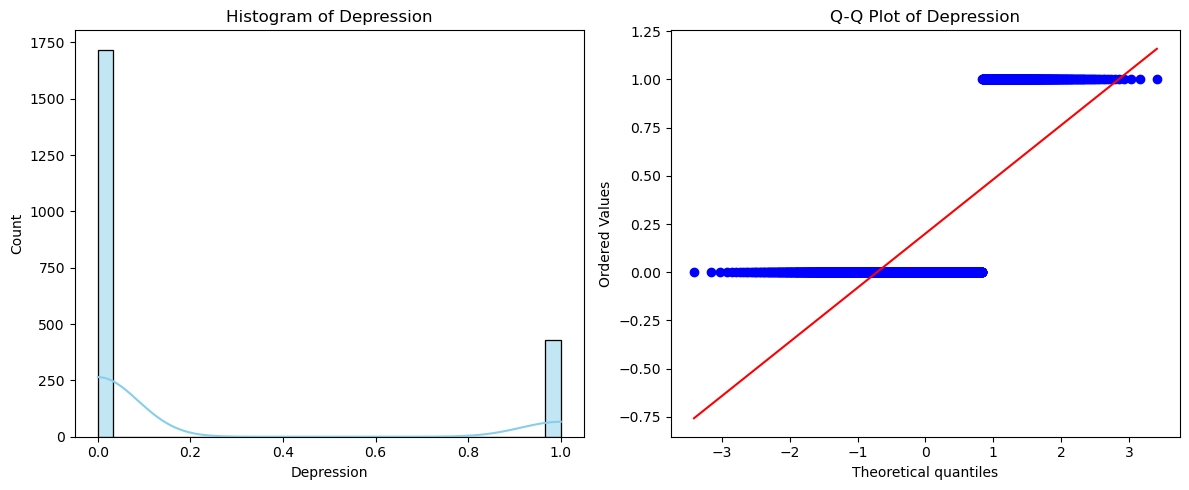

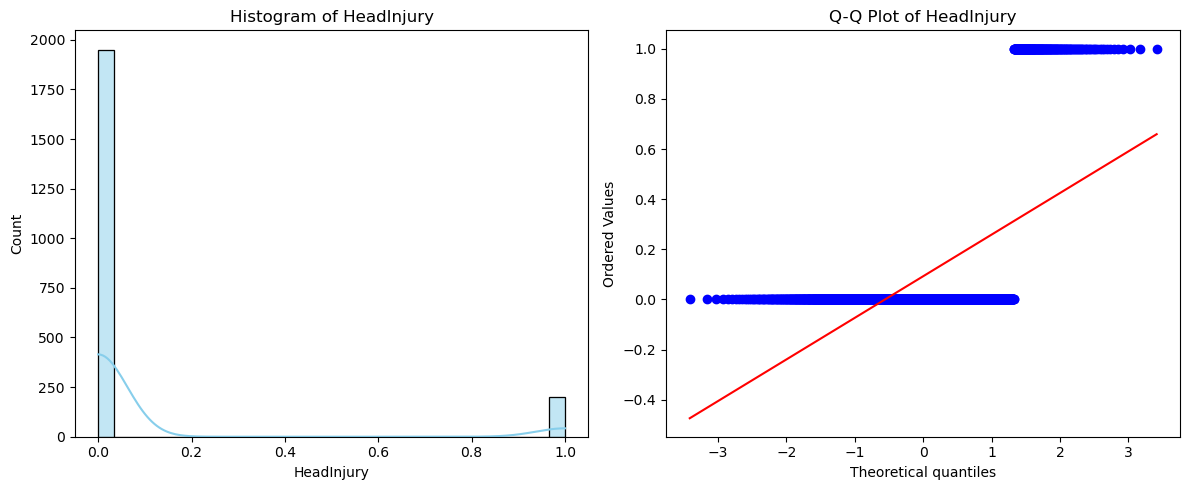

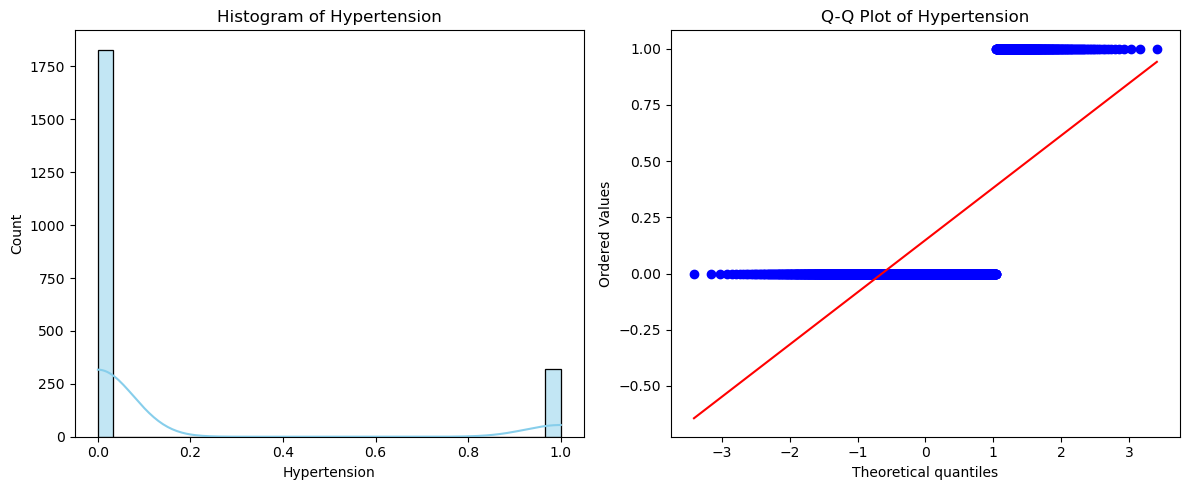

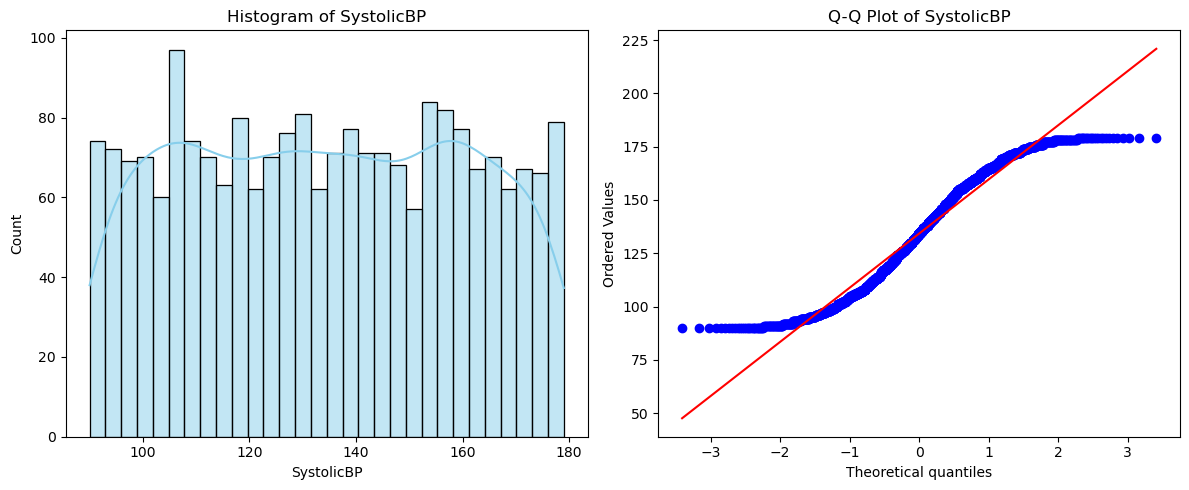

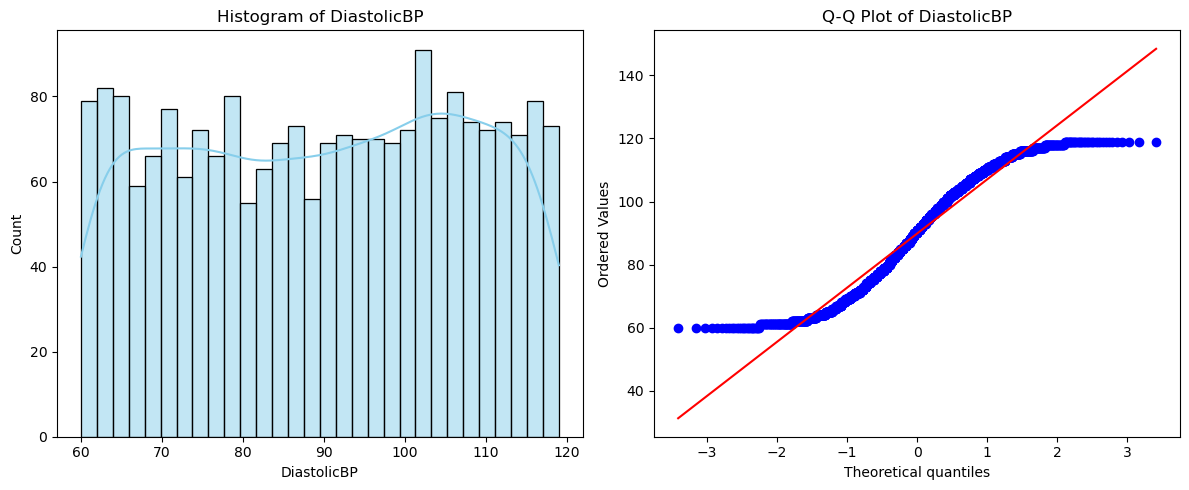

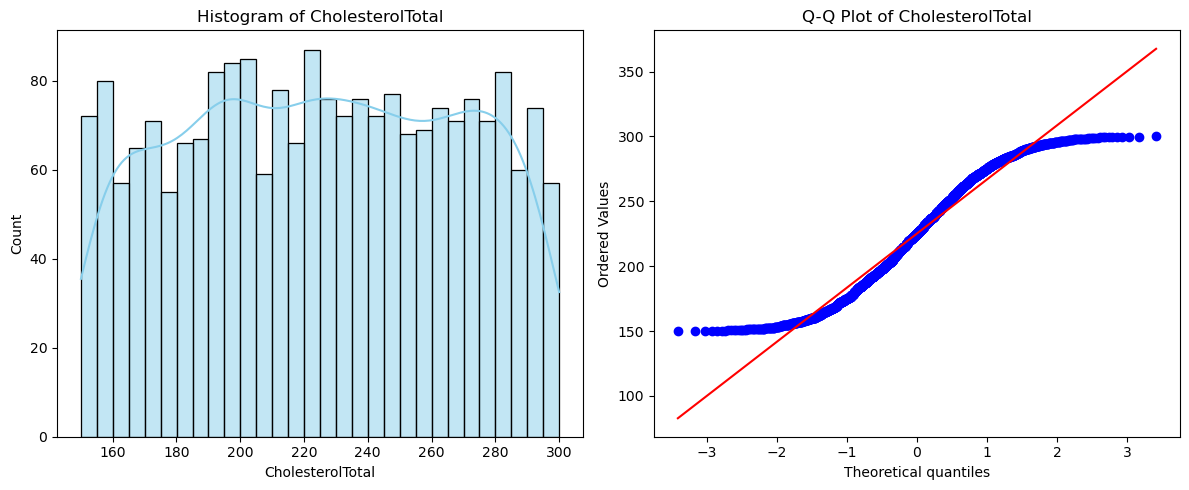

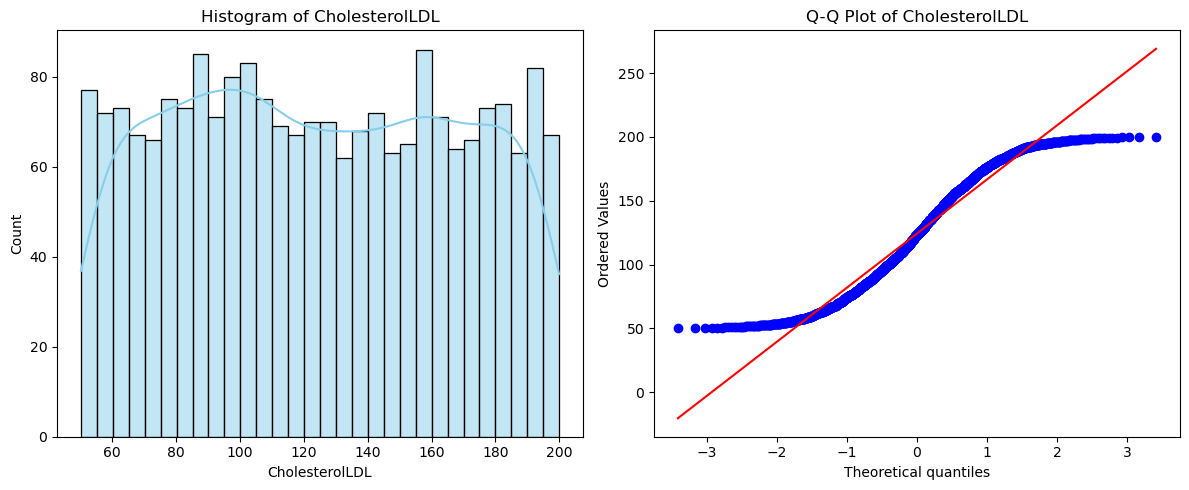

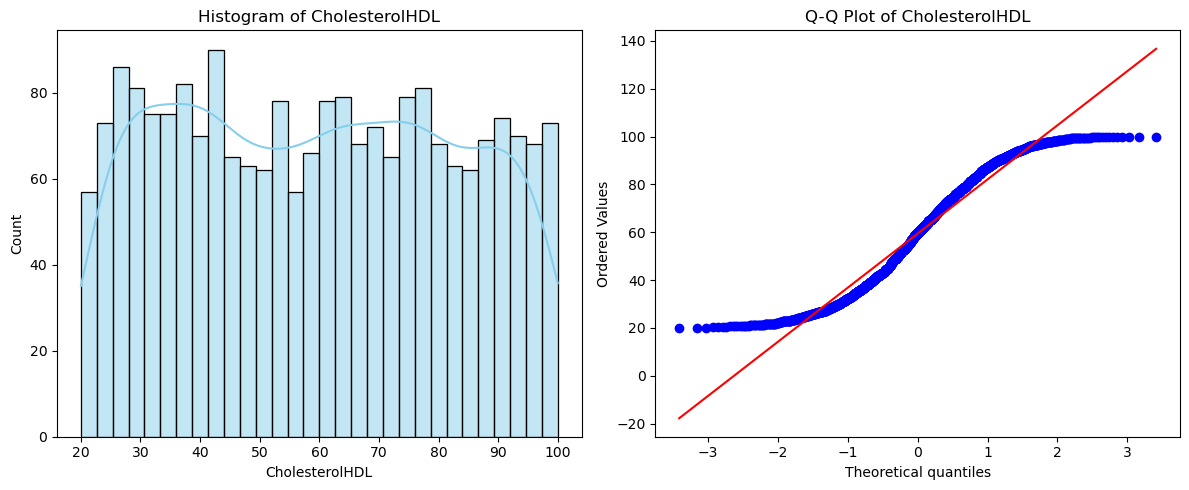

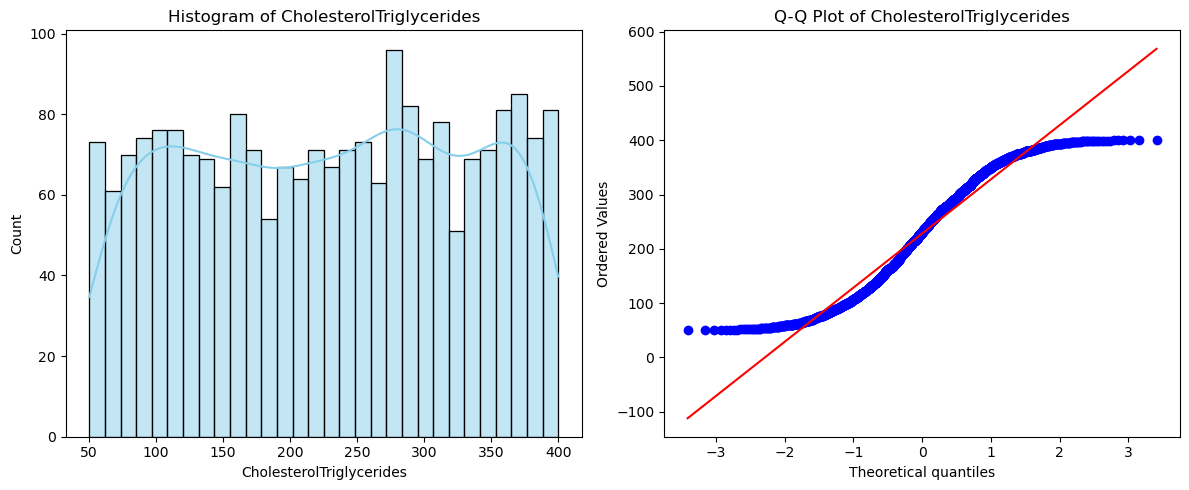

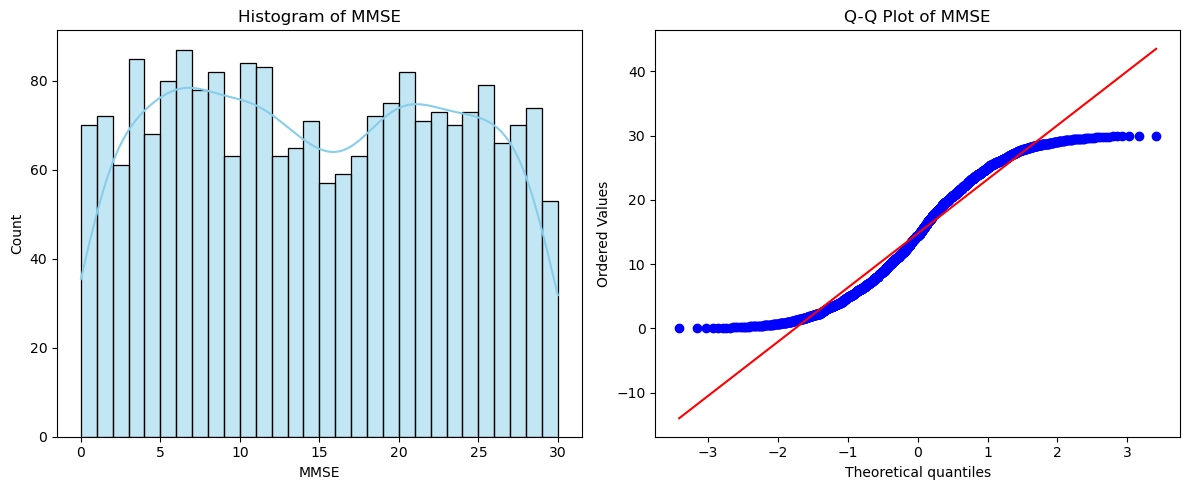

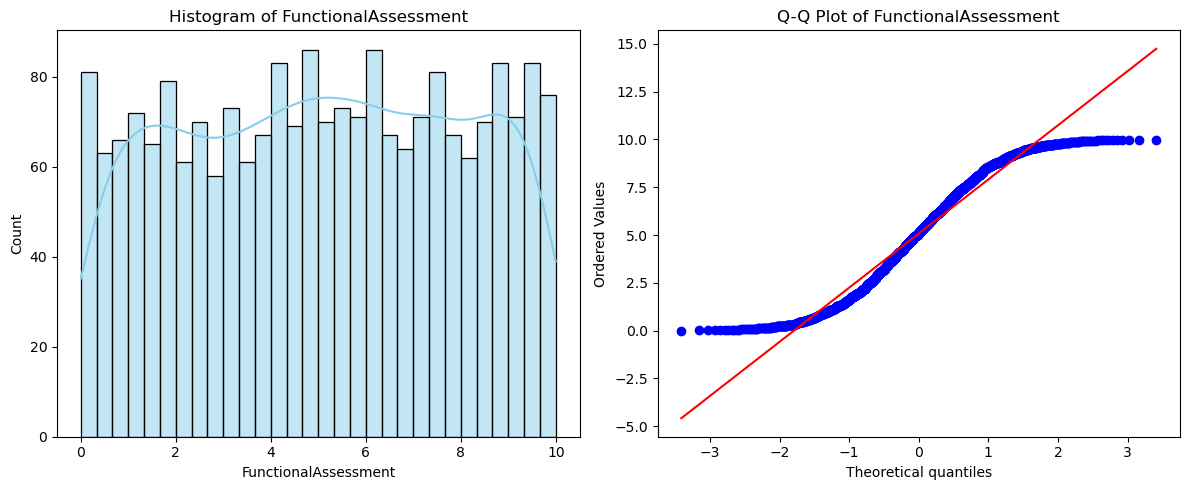

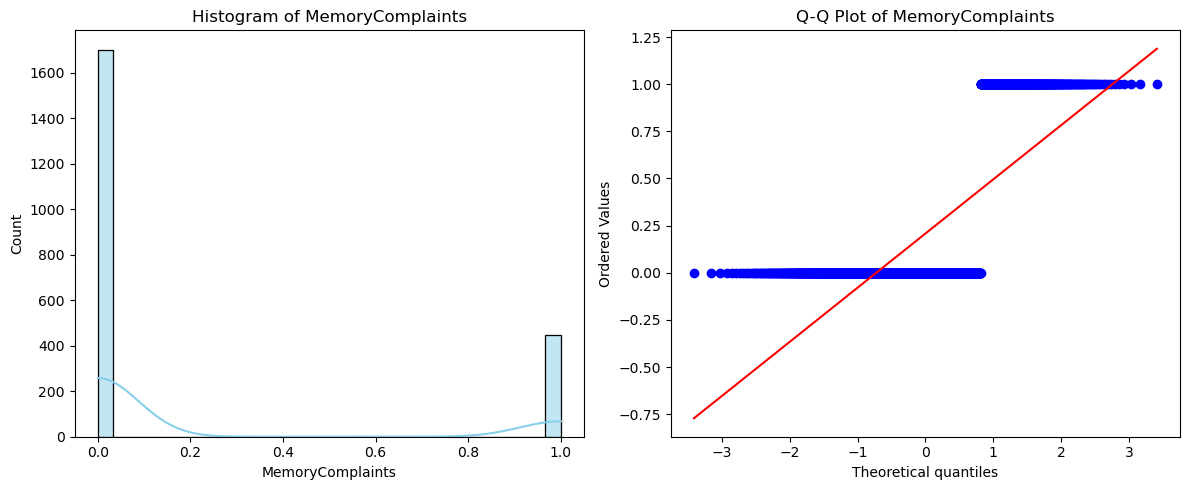

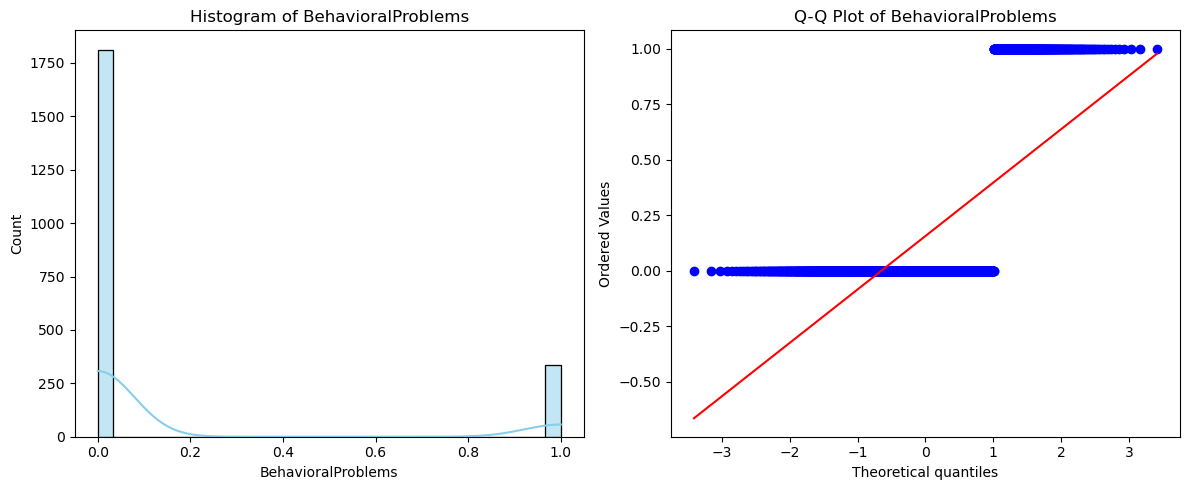

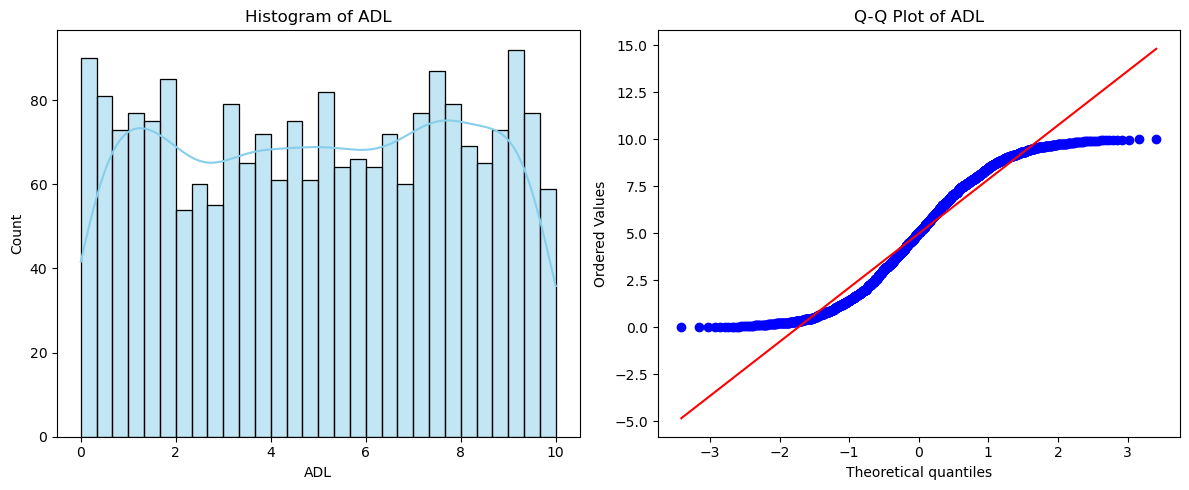

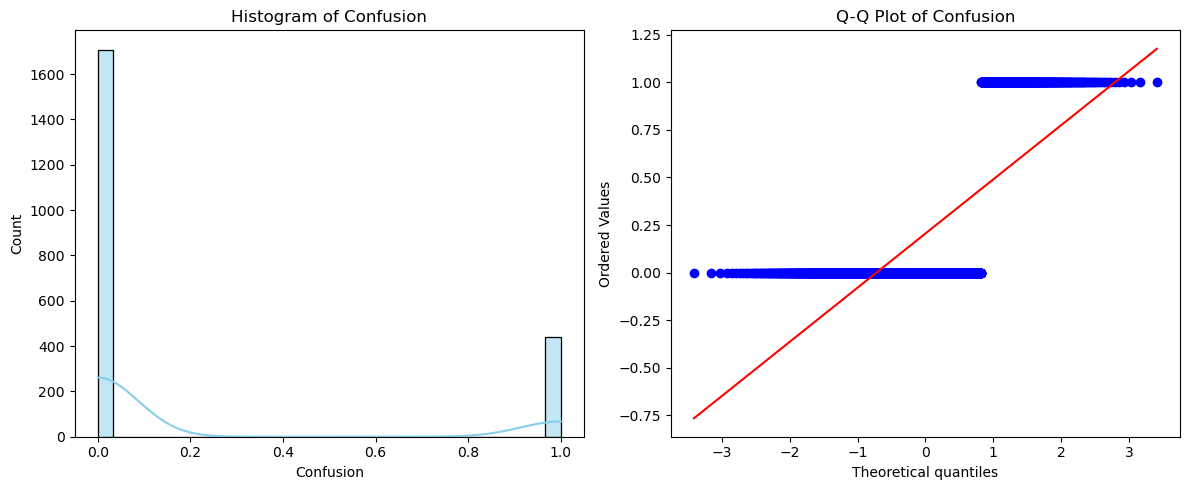

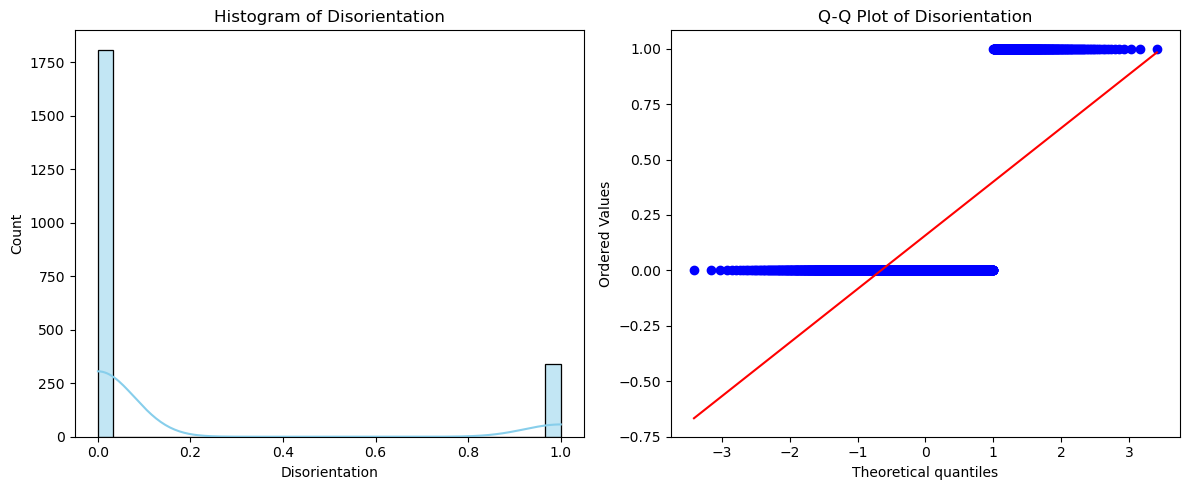

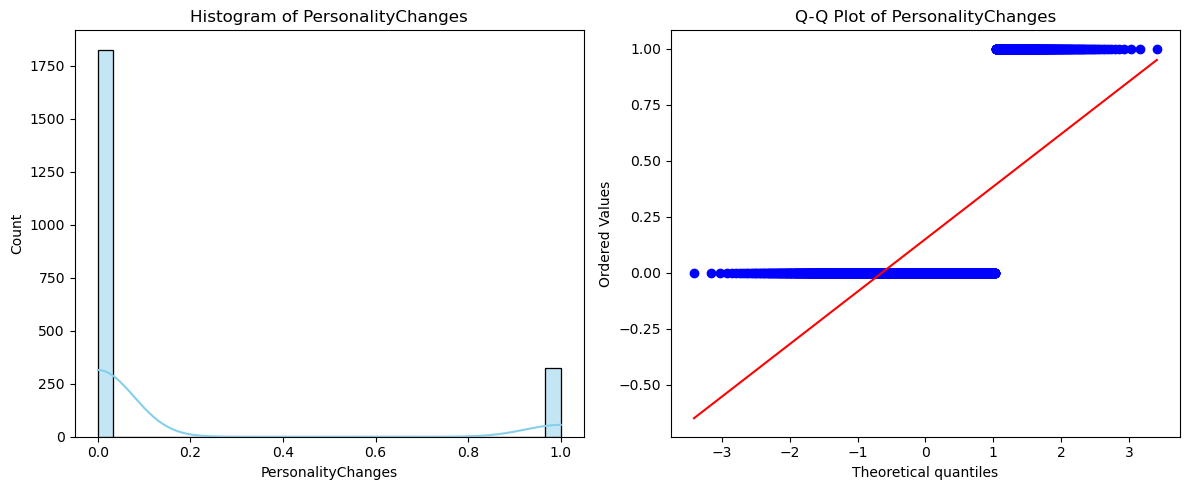

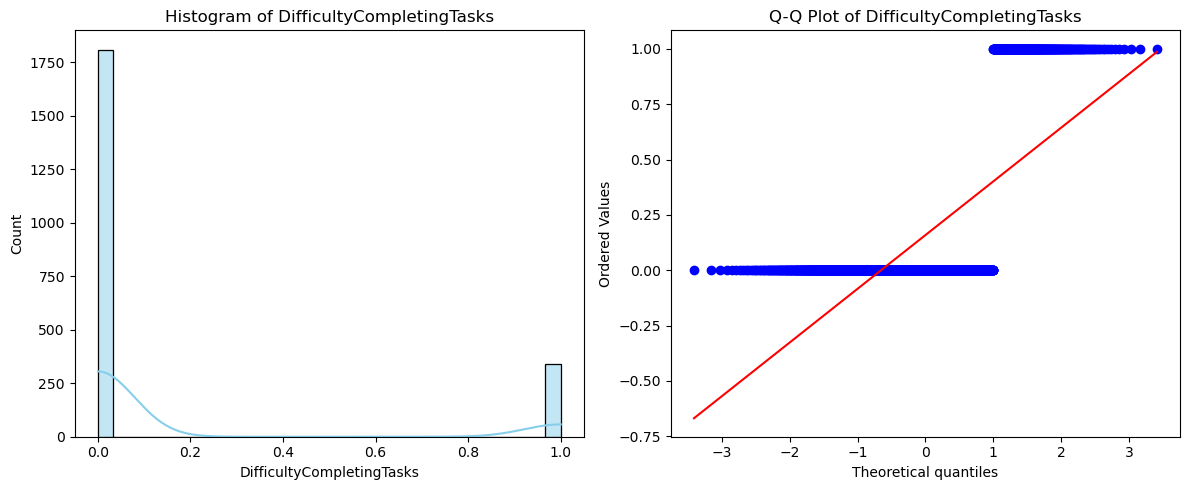

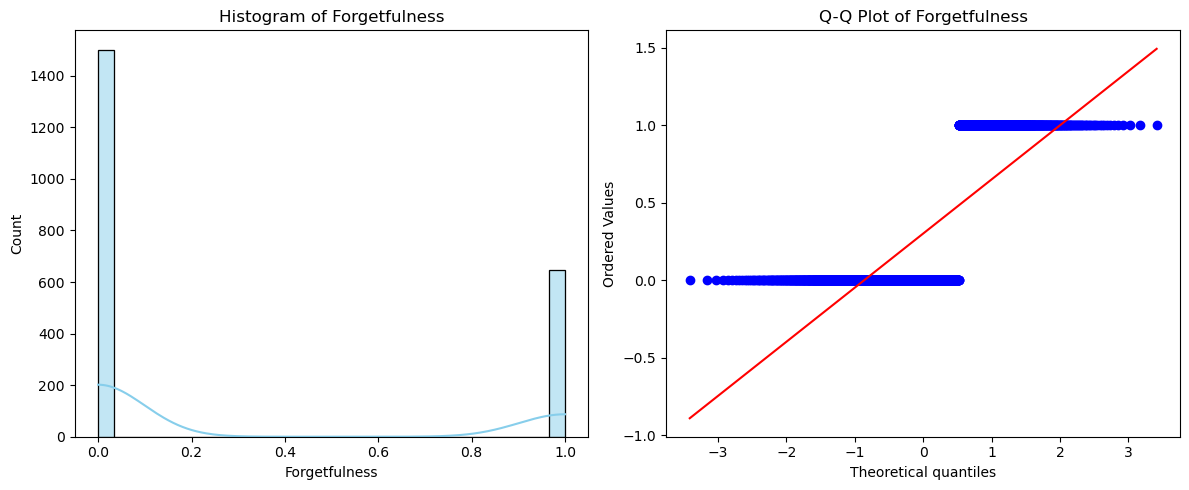

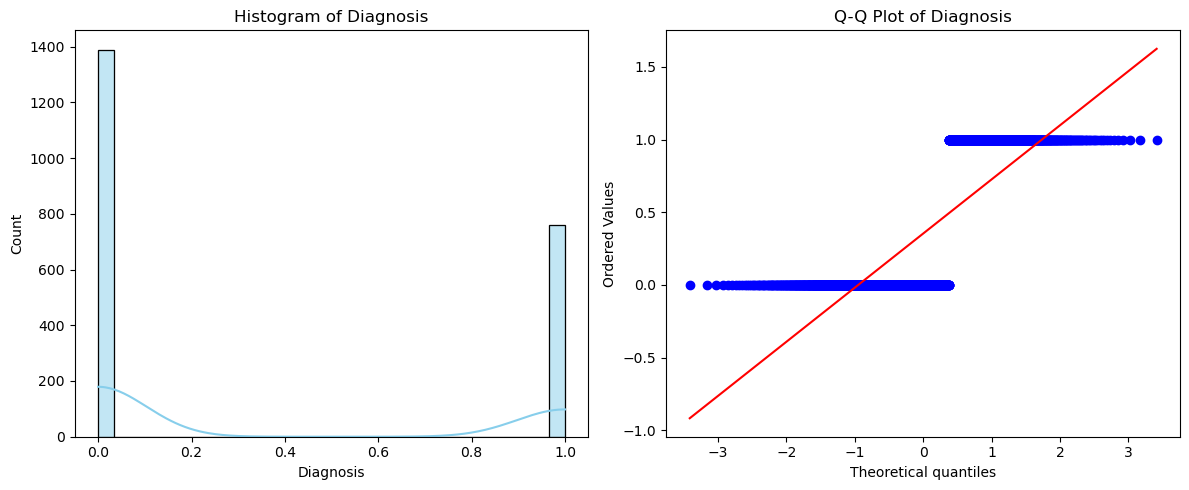

In [27]:
# Get numeric columns only
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram and QQ plot side by side
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # QQ plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()


<Axes: xlabel='Age', ylabel='Density'>

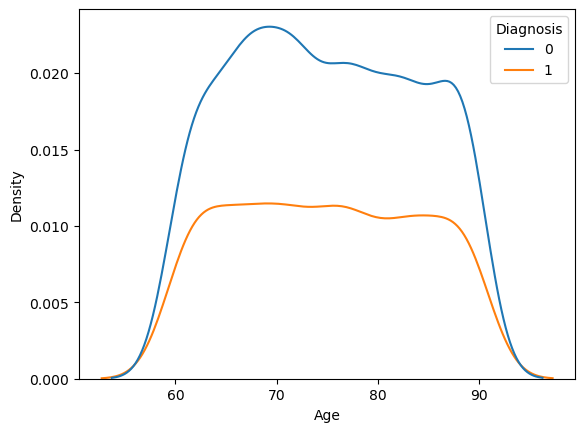

In [29]:
sns.kdeplot(data=data , x = 'Age', hue='Diagnosis')

In [32]:
# Use of Normal distribution

data['Age'].mean() + 3*data['Age'].std() # std value is +3 (for +ve)

101.87945884651151

In [33]:
data['Age'].mean() - 3*data['Age'].std()

47.93813073003572

In [ ]:
data[data['Age'] > 101] # there is no outlier

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis


In [38]:
data[data['Age'] < 47]

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis


# Machine Learning Algorithm

In [39]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

In [43]:
print(data.shape)
data.sample(1)

(2149, 33)


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
1254,72,1,1,1,32.391942,0,18.66821,9.335702,8.323286,7.950786,...,7.678172,0,0,3.037158,0,0,0,0,0,0


In [45]:
X = data.drop(columns='Diagnosis')
print(X.shape)

(2149, 32)


In [46]:
y = data['Diagnosis']
print(y.sample(1))

1532    0
Name: Diagnosis, dtype: int64


In [47]:
X_train , X_test  ,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [48]:
model1 = LinearRegression()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [49]:
print("MAE" , mean_absolute_error(y_test , y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

MAE 0.31735618824511336
MSE 0.14705514963512203
R2 0.37473305847112093


In [50]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor()

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)


In [51]:
print("MAE" , mean_absolute_error(y_test , y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

MAE 0.12285271317829459
MSE 0.06240062015503876
R2 0.734677466170639


In [60]:
# print("Sadab")